In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [31]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [39]:
df.shape

(614, 13)

this datasets contain total 614 rows and 13 columns out of 13 column one is target column and rest of columns is independent varable

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The above datasets contain the objective and float type datasets

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#checking the value fro each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

this datasets contain missing value in some column

In [39]:
#filing the nan value 
from sklearn.impute import SimpleImputer

In [40]:
imp=SimpleImputer(strategy='most_frequent')
df['Gender']=imp.fit_transform(df[['Gender']])
df['Married']=imp.fit_transform(df[['Married']])
df['Dependents']=imp.fit_transform(df[['Dependents']])
df['Self_Employed']=imp.fit_transform(df[['Self_Employed']])


In [41]:
imp=SimpleImputer(strategy='mean')
df['LoanAmount']=imp.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term']=imp.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History']=imp.fit_transform(df[['Credit_History']])

In [101]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

There are only 2 category present in datasets one is Y means Yes  and another is N means No.

In [8]:
print(df['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


Y stands for provide the loan and N stand for do not provide the loan

# Descriptin of the datasets 

In [7]:
#statical summary of numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


from the above description of datadest we can observe the following pionts
1.The mean value is greater than median in ApplicantIncome columns,CoapplicantIncome column and loan amount column which means data is skewed to right side
2.The mean value is less than in loan amount term column and credit history column which means data is skewed to right side
3.from the above observaton we can observe there is gap between 75% and max means outlier present in the datasets.
4 from the above observation we can say standard deviation present in datasets

# visualisation 

Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

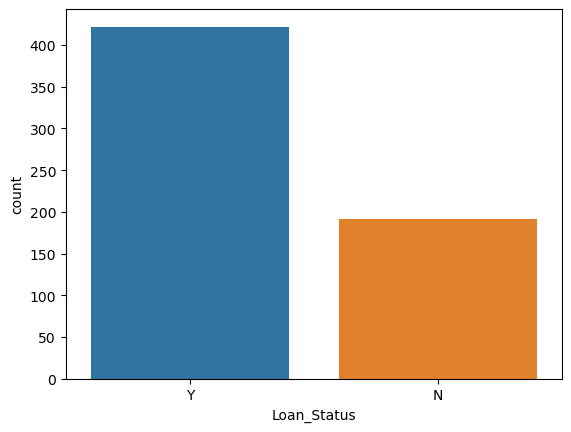

In [13]:
print(df['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status',data=df)

Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

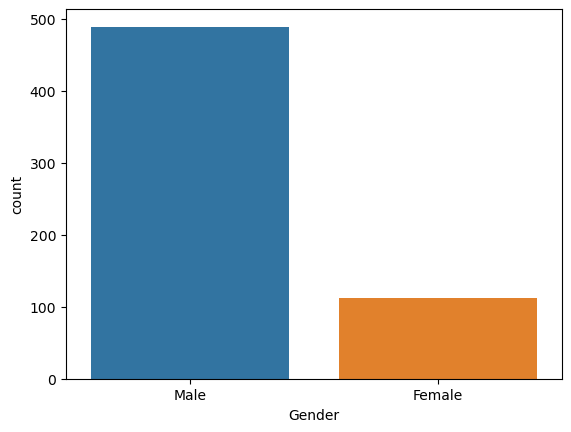

In [12]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df)

Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

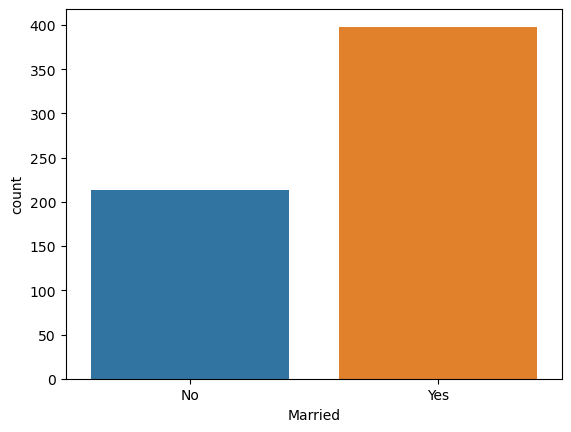

In [15]:
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

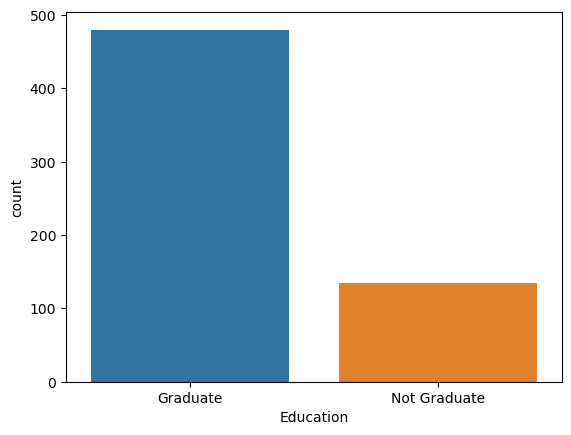

In [16]:
print(df['Education'].value_counts())
sns.countplot(x='Education',data=df)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

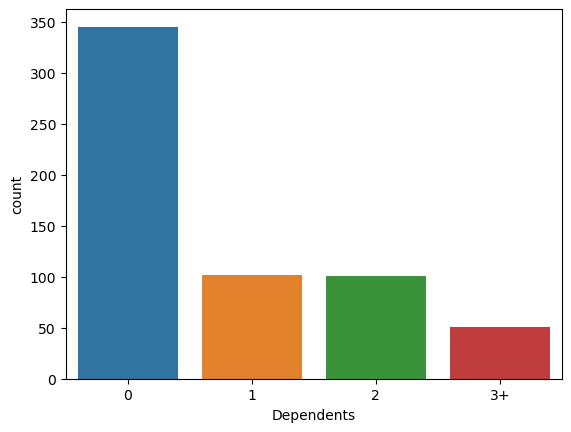

In [18]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df)

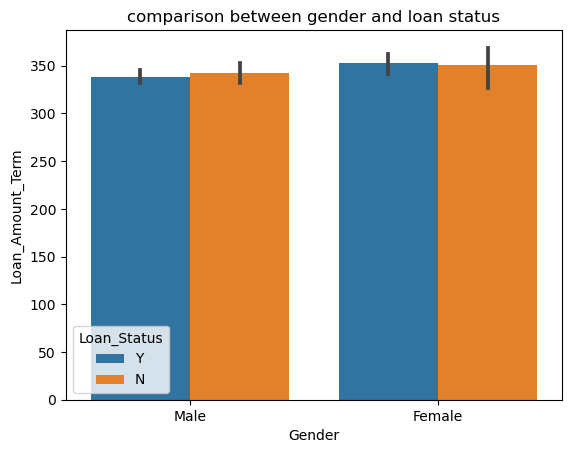

In [25]:
plt.title('comparison between gender and loan status')
sns.barplot(x='Gender',y='Loan_Amount_Term',data=df,hue='Loan_Status')
plt.show()

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

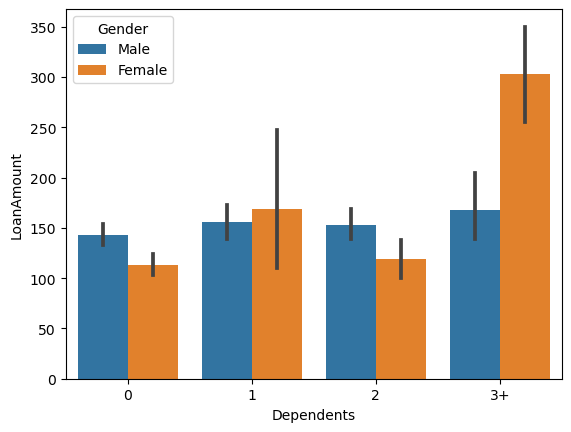

In [21]:
sns.barplot(x='Dependents',y='LoanAmount',data=df,hue='Gender')

<Axes: xlabel='Gender', ylabel='Loan_Amount_Term'>

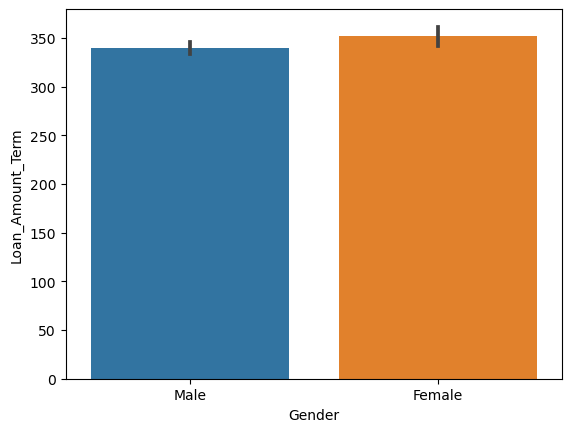

In [23]:
sns.barplot(x="Gender",y="Loan_Amount_Term",data=df)

<Axes: xlabel='Property_Area', ylabel='Credit_History'>

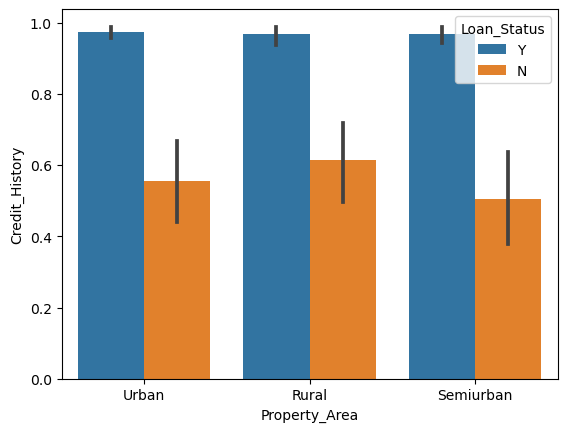

In [26]:
sns.barplot(x='Property_Area',y='Credit_History',data=df,hue='Loan_Status')

In [29]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


ApplicantIncome         Axes(0.125,0.712609;0.133621x0.167391)
CoapplicantIncome    Axes(0.285345,0.712609;0.133621x0.167391)
LoanAmount            Axes(0.44569,0.712609;0.133621x0.167391)
Loan_Amount_Term     Axes(0.606034,0.712609;0.133621x0.167391)
Credit_History       Axes(0.766379,0.712609;0.133621x0.167391)
dtype: object

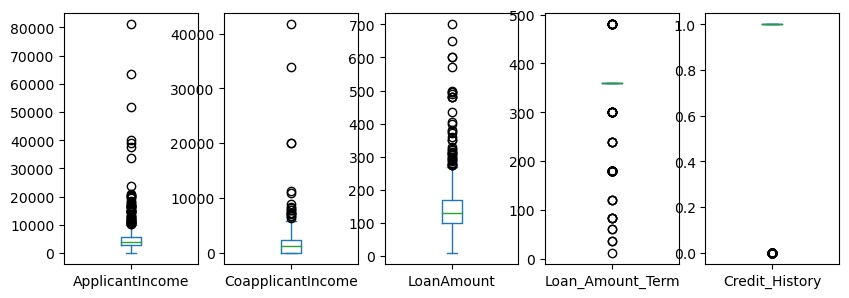

In [71]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,15))

In [72]:
from scipy.stats import zscore

In [74]:
feature=[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
z=np.abs(zscore(feature))
z

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U17'), dtype('<U17')) -> None

In [32]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>,
        <Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

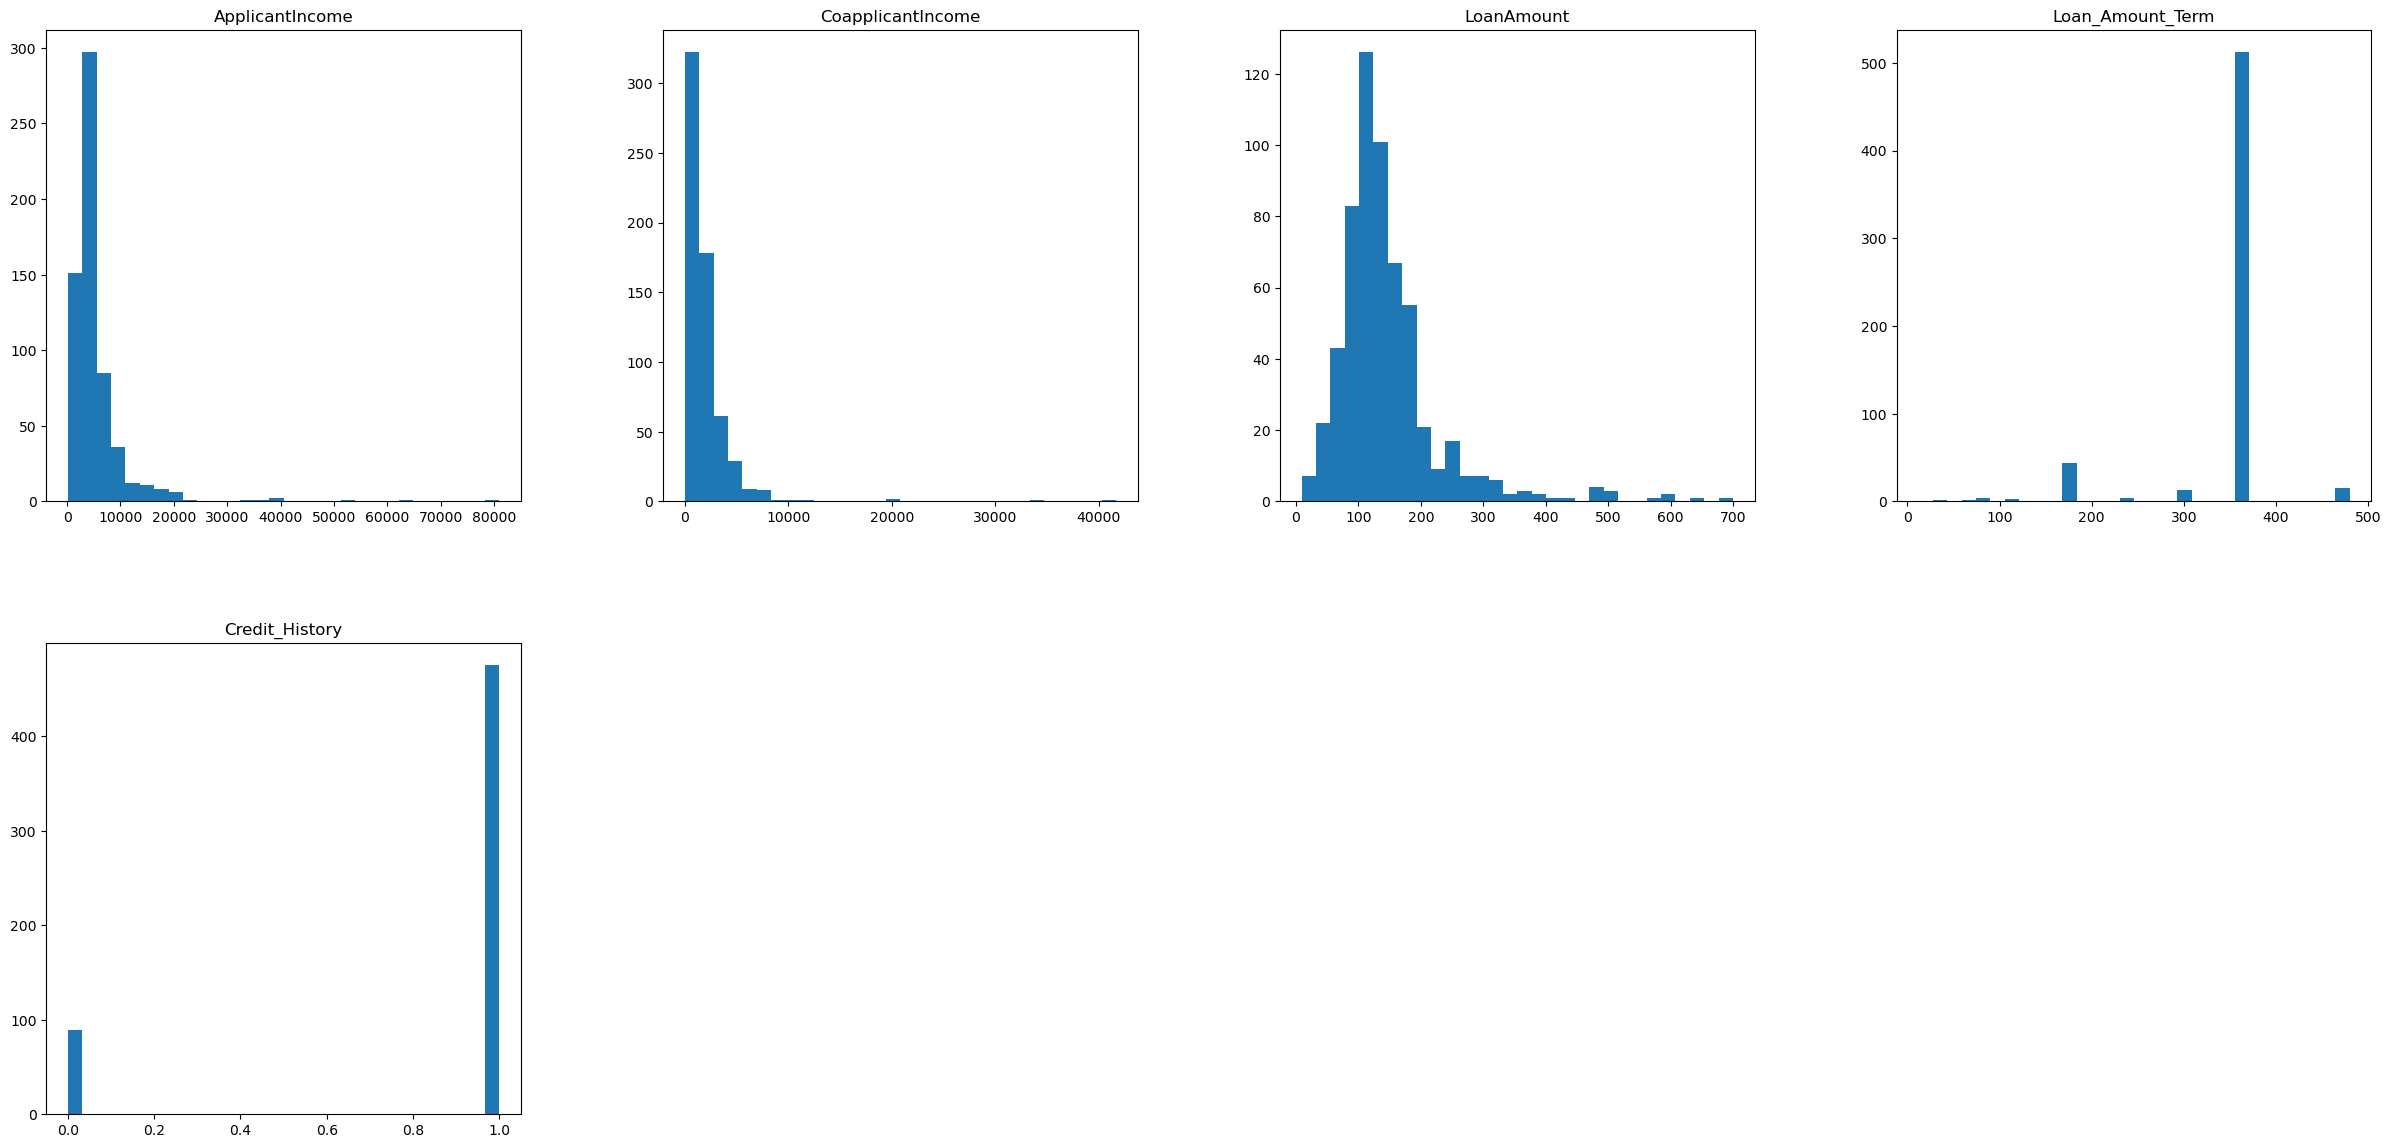

In [77]:
df.hist(figsize=(30,30),layout=(4,4),grid=False,bins=30)

In [33]:
#removing the skewnwss
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

In [34]:
df['LoanAmount']=np.log(df['LoanAmount'])

In [35]:
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])

In [36]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    0.979561
LoanAmount          -0.192998
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [89]:
df['Credit_History']=np.cbrt(df['Credit_History'])

In [90]:
df['Loan_Amount_Term']=np.cbrt(df['Loan_Amount_Term'])

In [91]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    0.979561
LoanAmount          -0.192998
Loan_Amount_Term    -3.528044
Credit_History      -1.882361
dtype: float64

In [42]:
#encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [43]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,2.160333,NaN,1.606719,360.0,1.0,2,1
1,1,1,1,1,0,0,2.131810,2.705280,1.579397,360.0,1.0,0,0
2,2,1,1,0,0,1,2.080237,NaN,1.432618,360.0,1.0,2,1
3,3,1,1,0,1,0,2.061368,2.786677,1.566007,360.0,1.0,2,1
4,4,1,0,0,0,0,2.163267,NaN,1.599137,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2.075994,NaN,1.449898,360.0,1.0,0,1
610,610,1,1,3,0,0,2.118687,NaN,1.305323,180.0,1.0,0,1
611,611,1,1,1,0,0,2.196797,2.341076,1.710801,360.0,1.0,2,1
612,612,1,1,2,0,0,2.189827,NaN,1.654623,360.0,1.0,2,1


In [ ]:
#checking the corelation between the feature and target column

In [17]:
cor=df.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.009992,-0.048446,0.026617,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.087912,0.001071,0.147157,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.015872,-0.145513,0.178885,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.110291,-0.081477,0.147674,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.176590,-0.149666,-0.127580,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.183449,0.092152,0.103460,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.009992,0.087912,0.015872,0.110291,-0.176590,0.183449,1.000000,0.006383,0.439664,-0.029554,0.017560,-0.028496,0.014508
CoapplicantIncome,-0.048446,0.001071,-0.145513,-0.081477,-0.149666,0.092152,0.006383,1.000000,0.361927,-0.073924,-0.065497,-0.021162,-0.141408
LoanAmount,0.026617,0.147157,0.178885,0.147674,-0.127580,0.103460,0.439664,0.361927,1.000000,0.097807,-0.031382,-0.101113,-0.038210
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.029554,-0.073924,0.097807,1.000000,0.001395,-0.077620,-0.020974


This gives corealtion between the dependent and independent variable

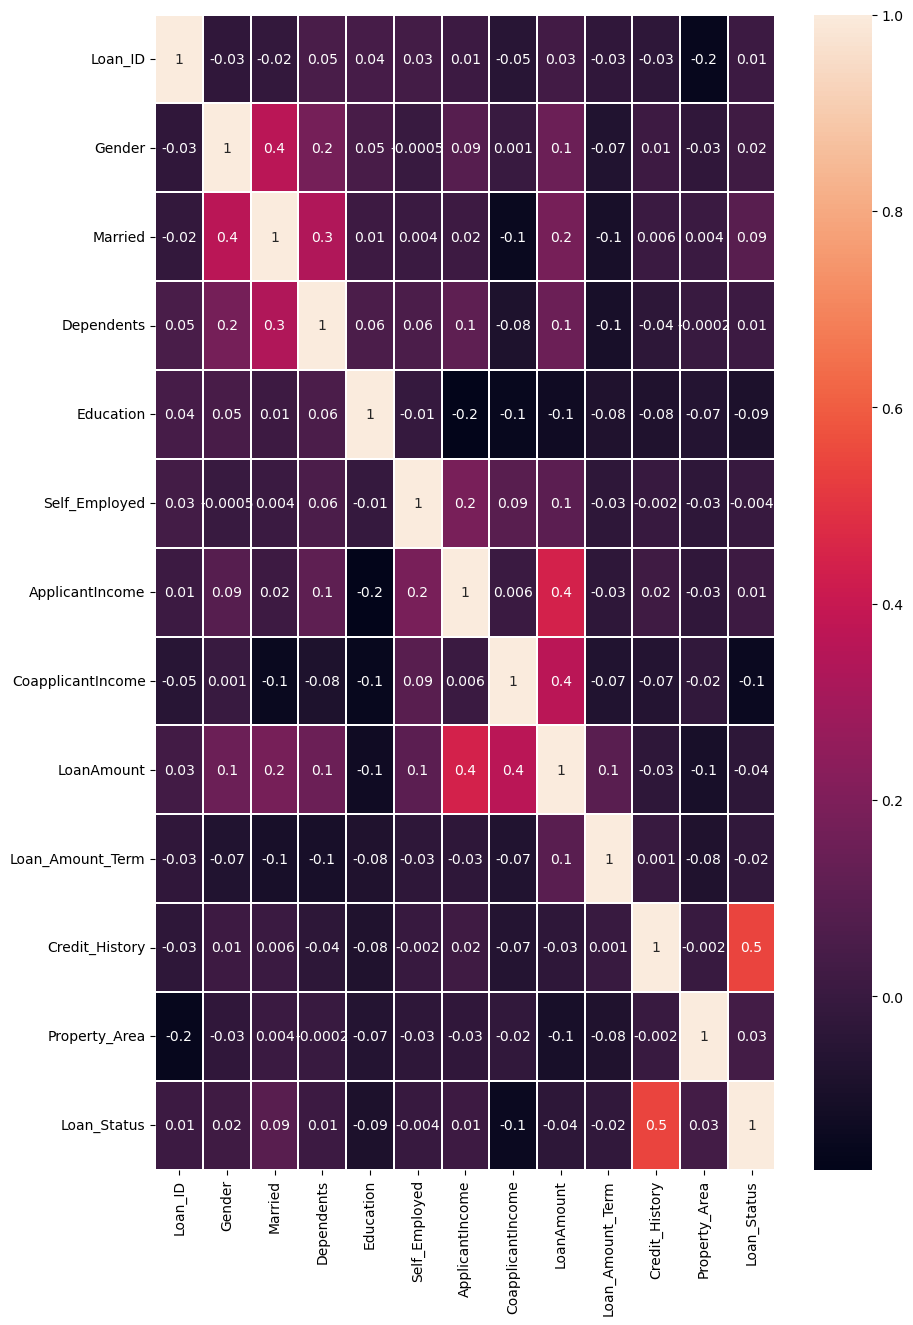

In [18]:
cor_hmap=df.corr()
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,fmt='.1g')
plt.show()

In [44]:
#seprating the feature and target column
x=df.drop('Loan_Status',axis=1)

In [45]:
y=df['Loan_Status']

In [46]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,8.674026,0.000000,4.857444,360.0,1.0,2
1,1,1,1,1,0,0,8.430109,38.832976,4.852030,360.0,1.0,0
2,2,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2
3,3,1,1,0,1,0,7.856707,48.559242,4.787492,360.0,1.0,2
4,4,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,7.972466,0.000000,4.262680,360.0,1.0,0
610,610,1,1,3,0,0,8.320205,0.000000,3.688879,180.0,1.0,0
611,611,1,1,1,0,0,8.996157,15.491933,5.533389,360.0,1.0,2
612,612,1,1,2,0,0,8.933664,0.000000,5.231109,360.0,1.0,2


In [22]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [23]:
#feature scaling using the standard scaler method
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729232,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.544464,NaN,0.288245,0.279851,0.451640,1.223298
1,-1.723590,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.175590,-0.549807,0.032030,0.279851,0.451640,-1.318513
2,-1.717948,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.491364,NaN,-1.344399,0.279851,0.451640,1.223298
3,-1.712307,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.735393,0.081060,-0.093541,0.279851,0.451640,1.223298
4,-1.706665,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.582410,NaN,0.217141,0.279851,0.451640,1.223298
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.546240,NaN,-1.182357,0.279851,0.451640,-1.318513
610,1.712307,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.005881,NaN,-2.538121,-2.518655,0.451640,-1.318513
611,1.717948,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.016035,-3.372560,1.264273,0.279851,0.451640,1.223298
612,1.723590,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.925886,NaN,0.737466,0.279851,0.451640,1.223298


In [47]:
#checking the varince inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [48]:
vif=pd.DataFrame()
vif["VIF.values"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
vif['features']=x.columns
vif

,VIF.values,features
0,4.055994,Loan_ID
1,5.803189,Gender
2,3.763193,Married
3,1.842959,Dependents
4,1.276593,Education
5,1.218266,Self_Employed
6,167.897793,ApplicantIncome
7,2.670488,CoapplicantIncome
8,168.132028,LoanAmount
9,26.547845,Loan_Amount_Term


In [121]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# oversampling

In [49]:
#oversampling the data using the smote technique
from imblearn.over_sampling import SMOTE

In [50]:
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)

In [125]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [51]:
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.33,random_state=43)

In [54]:
x_train.shape

(565, 12)

In [55]:
x_test.shape

(279, 12)

In [56]:
y_train.shape

(565,)

In [57]:
y_test.shape

(279,)

In [58]:
lg=LogisticRegression()
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))


0.7777777777777778
[[ 97  46]
 [ 16 120]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       143
           1       0.72      0.88      0.79       136

    accuracy                           0.78       279
   macro avg       0.79      0.78      0.78       279
weighted avg       0.79      0.78      0.78       279



The accuracy score is 81 percentage using the logistic regression

In [59]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.5591397849462365
[[80 63]
 [60 76]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       143
           1       0.55      0.56      0.55       136

    accuracy                           0.56       279
   macro avg       0.56      0.56      0.56       279
weighted avg       0.56      0.56      0.56       279



In [ ]:
accuracy score 55 percentage using kneighbourclassifier

In [60]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5017921146953405
[[ 31 112]
 [ 27 109]]
              precision    recall  f1-score   support

           0       0.53      0.22      0.31       143
           1       0.49      0.80      0.61       136

    accuracy                           0.50       279
   macro avg       0.51      0.51      0.46       279
weighted avg       0.51      0.50      0.46       279



accuracy score 50 percentage using the support vector

In [61]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
print(accuracy_score(rfpred,y_test))
print(confusion_matrix(rfpred,y_test))
print(classification_report(rfpred,y_test))

0.8279569892473119
[[111  16]
 [ 32 120]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       127
           1       0.88      0.79      0.83       152

    accuracy                           0.83       279
   macro avg       0.83      0.83      0.83       279
weighted avg       0.83      0.83      0.83       279



accuracy score 82 percentage using the random forest

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
etr= ExtraTreesClassifier()
etr.fit(x_train,y_train)
etrpred=etr.predict(x_test)
print(accuracy_score(etrpred,y_test))
print(confusion_matrix(etrpred,y_test))
print(classification_report(etrpred,y_test))

0.8494623655913979
[[114  13]
 [ 29 123]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       127
           1       0.90      0.81      0.85       152

    accuracy                           0.85       279
   macro avg       0.85      0.85      0.85       279
weighted avg       0.86      0.85      0.85       279



In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbcpred=gbc.predict(x_test)
print(accuracy_score(gbcpred,y_test))
print(confusion_matrix(gbcpred,y_test))
print(classification_report(gbcpred,y_test))

0.7849462365591398
[[104  21]
 [ 39 115]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       125
           1       0.85      0.75      0.79       154

    accuracy                           0.78       279
   macro avg       0.79      0.79      0.78       279
weighted avg       0.79      0.78      0.79       279



In [68]:
from sklearn.model_selection import cross_val_score

In [72]:
score=cross_val_score(rf,x,y)
print(score)
print(score.mean())
print('difference between accuracy and cross validation score is',accuracy_score(y_test,rfpred)-score.mean())

[0.69918699 0.76422764 0.78861789 0.83739837 0.79508197]
0.7769025723044115
difference between accuracy and cross validation score is 0.05105441694290036


In [73]:
score=cross_val_score(lg,x,y)
print(score)
print(score.mean())
print('difference between accuracy and cross validation score is',accuracy_score(y_test,predlg)-score.mean())

[0.81300813 0.77235772 0.7804878  0.86178862 0.81967213]
0.8094628815140611
difference between accuracy and cross validation score is -0.031685103736283304


In [74]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('difference between accuracy and cross validation score is',accuracy_score(y_test,predknn)-score.mean())

[0.47154472 0.59349593 0.69105691 0.63414634 0.52459016]
0.5829668132746901
difference between accuracy and cross validation score is -0.023827028328453626


In [75]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between accuracy and cross validation score is',accuracy_score(y_test,predsvc)-score.mean())

[0.69105691 0.69105691 0.68292683 0.68292683 0.68852459]
0.6872984139677463
difference between accuracy and cross validation score is -0.1855062992724058


In [76]:
score=cross_val_score(etr,x,y)
print(score)
print(score.mean())
print('difference between accuracy and cross validation score is',accuracy_score(y_test,etrpred)-score.mean())

[0.7804878  0.74796748 0.7804878  0.81300813 0.75409836]
0.7752099160335865
difference between accuracy and cross validation score is 0.0742524495578114


In [77]:
score=cross_val_score(gbc,x,y)
print(score)
print(score.mean())
print('difference between accuracy and cross validation score is',accuracy_score(y_test,gbcpred)-score.mean())

[0.63414634 0.69105691 0.7804878  0.80487805 0.72131148]
0.7263761162201785
difference between accuracy and cross validation score is 0.05857012033896125


In [80]:
from sklearn.model_selection import GridSearchCV

In [78]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [81]:
model=GridSearchCV(lg,param_grid,cv=5)
model.fit(x_train,y_train)
model.best_params_
model.best_score_

0.7858407079646018

In [82]:
#ploting the auc and roc curve
from sklearn.metrics import roc_auc_score


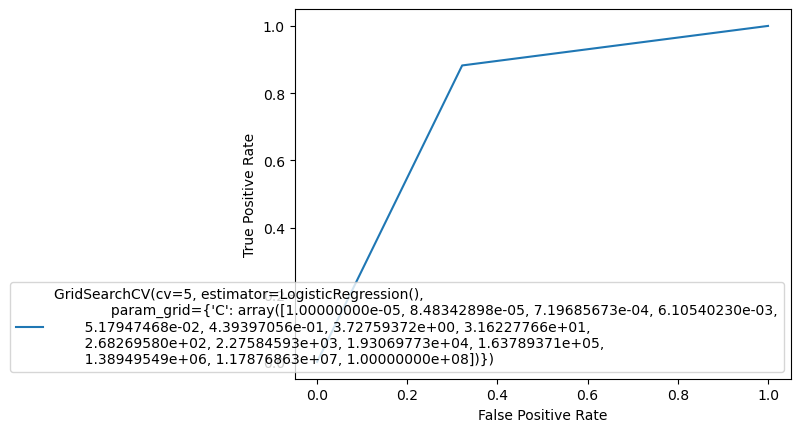

In [83]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,predlg)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name=model)
display.plot()

In [84]:
#saving the best model
import joblib

In [85]:
#saving the model as object file
joblib.dump(model,'loanstatus.obj')

['loanstatus.obj']

In [86]:
#loading the model
mymodel=joblib.load('loanstatus.obj')


In [91]:
mymodel.predict(x_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1])